In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# pull csv file
df = pd.read_csv('AB_NYC_2019_clean.csv')
df.head()

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
# create new df for neighbourhood and room type
br_df = df[['id','neighbourhood_group','room_type','price']]
br_df.head()
#br_df['room_type'].value_counts()

,id,neighbourhood_group,room_type,price
0,2539,Brooklyn,Private room,149
1,2595,Manhattan,Entire home/apt,225
2,3647,Manhattan,Private room,150
3,3831,Brooklyn,Entire home/apt,89
4,5022,Manhattan,Entire home/apt,80


In [4]:
#create bounds
lowerq = br_df['price'].quantile([.25,.5,.75])[0.25]
upperq = br_df['price'].quantile([.25,.5,.75])[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

br_df = br_df.loc[(br_df['price'] > 0) & (br_df['price'] < upper_bound) ]

In [6]:

#Private room
prive_room_df = br_df.loc[(br_df['room_type'] == 'Private room')]

#Entire home/apt
entire_home_df = br_df.loc[(br_df['room_type'] == 'Entire home/apt')]

#Shared room
shared_room_df = br_df.loc[(br_df['room_type'] == 'Shared room')]

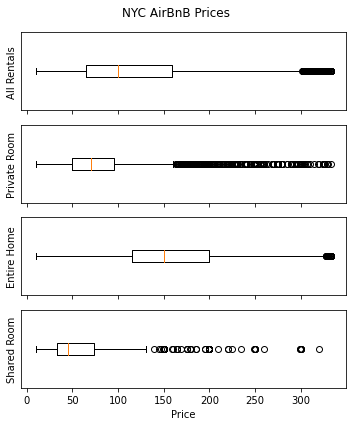

In [7]:

fig1, ax = plt.subplots(4,figsize=(5,6),sharex=True)
fig1.suptitle('NYC AirBnB Prices')
#ax[0].set_title('NYC AirBnB Price')
ax[0].set_ylabel('All Rentals')
ax[0].boxplot(br_df['price'],vert=False)
ax[0].yaxis.set_ticks([])

ax[1].set_ylabel('Private Room')
ax[1].boxplot(prive_room_df['price'],vert=False)
ax[1].yaxis.set_ticks([])

ax[2].set_ylabel('Entire Home')
ax[2].boxplot(entire_home_df['price'],vert=False)
ax[2].yaxis.set_ticks([])

ax[3].set_xlabel('Price')
ax[3].set_ylabel('Shared Room')
ax[3].boxplot(shared_room_df['price'],vert=False)
ax[3].yaxis.set_ticks([])


fig1.tight_layout()

[]

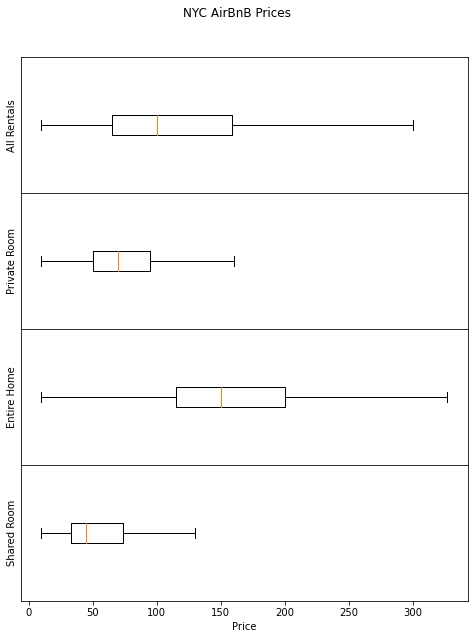

In [8]:
fig = plt.figure(figsize=(8,10))
gs = fig.add_gridspec(4,hspace=0)
ax = gs.subplots(sharex=True)
fig.suptitle('NYC AirBnB Prices',y=.95)

box1 = ax[0].boxplot(br_df['price'],vert=False,showfliers=False)
ax[0].set_ylabel('All Rentals')
ax[0].yaxis.set_ticks([])


box3 = ax[2].boxplot(entire_home_df['price'],vert=False,showfliers=False)
ax[2].set_ylabel('Entire Home')
ax[2].yaxis.set_ticks([])

box2 = ax[1].boxplot(prive_room_df['price'],vert=False,showfliers=False)
ax[1].set_ylabel('Private Room')
ax[1].yaxis.set_ticks([])


box4 = ax[3].boxplot(shared_room_df['price'],vert=False,showfliers=False)
ax[3].set_xlabel('Price')
ax[3].set_ylabel('Shared Room')
ax[3].yaxis.set_ticks([])


In [9]:
group1 = br_df[br_df['room_type']=='Shared room']['price']
group2 = br_df[br_df['room_type']=='Private room']['price']
group3 = br_df[br_df['room_type']=='Entire home/apt']['price']


In [10]:
sts.f_oneway(group1, group2, group3)

F_onewayResult(statistic=14439.617968153561, pvalue=0.0)